# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [1]:
#!pip install pmdarima

In [2]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
import warnings
warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('./Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


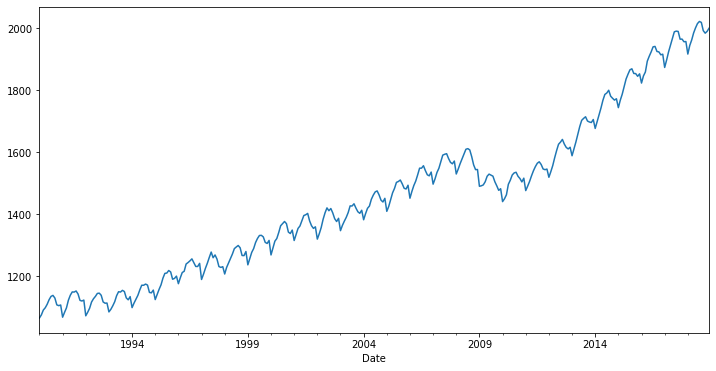

In [3]:
## Постройте график атрибута 'Employees'
df.Employees.plot(figsize=(12,6));

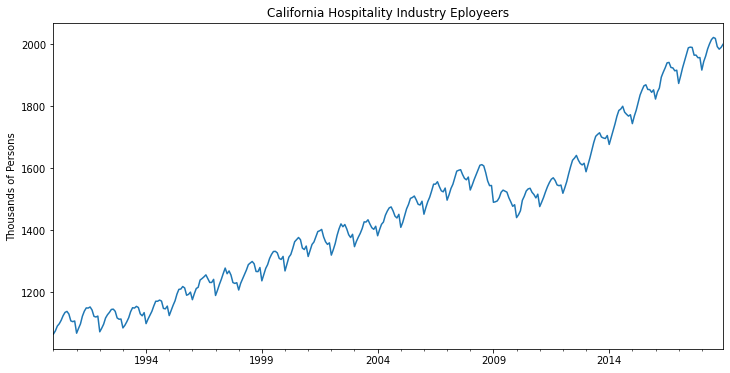

In [4]:
# добавьте заголовок и подписи
ax = df.Employees.plot(figsize=(12,6))
title = 'California Hospitality Industry Eployeers'
ylabel='Thousands of Persons'
xlabel=''
ax.set(title=title, xlabel=xlabel, ylabel=ylabel);

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

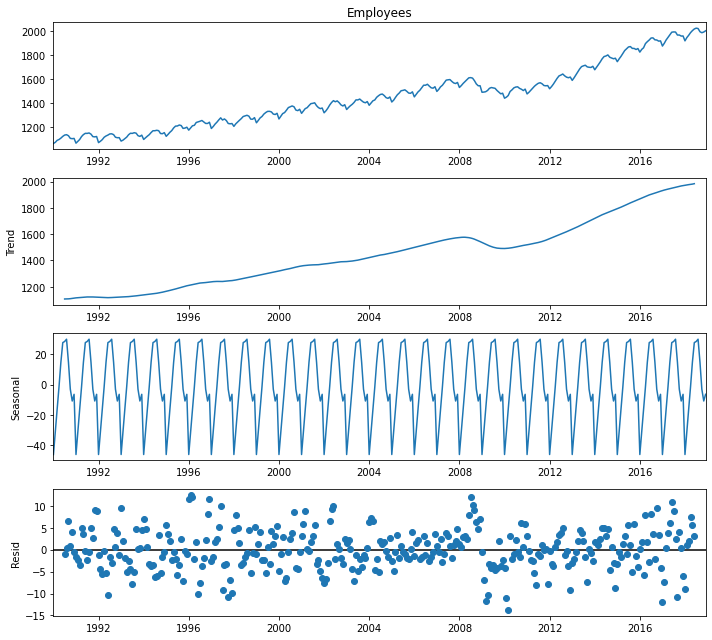

In [5]:
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 10, 9
result = seasonal_decompose(df.Employees) # model='additive' default
result.plot();

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [6]:
auto_arima(df.Employees, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sat, 26 Feb 2022   AIC                           2208.504
Time:                                      11:40:06   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.530      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.488      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.137      0.033       0.011       0.247
ar.S.L12       0.9972      0.001    706.684      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.305      0.000      -0.834      -0.664
sigma2        29.3007      1.718     17.060      0.000      25.934      32.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [7]:
#train = df.iloc[:len(df)-12]
#test = df.iloc[len(df)-12:]
train = df.iloc[:-12]
test = df.iloc[-12:]

### 5. Обучите SARIMA(1,1,2)x(1,0,1,12) на train['Employees']

In [8]:
model = SARIMAX(train.Employees, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12) )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sat, 26 Feb 2022   AIC                           2128.116
Time:                                      11:40:07   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.206      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.665      0.000      -1.096      -0.821
ma.L2          0.1499      0.061      2.475      0.013       0.031       0.269
ar.S.L12       0.9973      0.001    729.417      0.000       0.995       1.000
ma.S.L12      -0.7521      0.044    -17.172      0.000      -0.838      -0.666
sigma2        28.7675      1.684     17.078      0.000      25.466      32.069
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.29
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [9]:
start = len(train)
end = len(df)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')\
    .rename('SARIMA(1,1,2)x(1,0,1,12)Predictions')

### 7. Нарисуйте графики прогнозируемых и известных значений


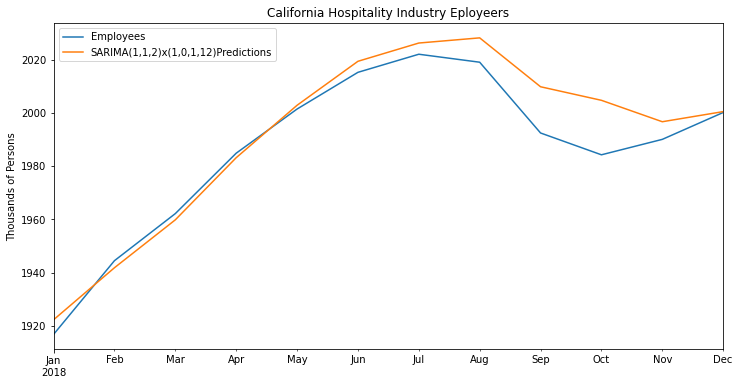

In [10]:
title = 'California Hospitality Industry Eployeers'
ylabel='Thousands of Persons'
xlabel=''

ax = test.Employees.plot(figsize=(12,6))
predictions.plot()
ax.autoscale(axis='x',tight=True)
ax.legend()
ax.set(title=title,
       xlabel=xlabel, 
       ylabel=ylabel);

### 8. Оцените качество модели с помощью MSE и RMSE


In [11]:
mse_value = mean_squared_error(test.Employees, predictions)
rmse_value = rmse(test.Employees, predictions)
print(f'SARIMA(1,1,2)x(1,0,1,12) MSE Error: {mse_value:11.10}')
print(f'SARIMA(1,1,2)x(1,0,1,12) RMSE Error: {rmse_value:11.10}')

SARIMA(1,1,2)x(1,0,1,12) MSE Error: 77.62983463
SARIMA(1,1,2)x(1,0,1,12) RMSE Error: 8.810779457


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [12]:
model = SARIMAX(df.Employees, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sat, 26 Feb 2022   AIC                           2208.504
Time:                                      11:40:09   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.530      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.488      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.137      0.033       0.011       0.247
ar.S.L12       0.9972      0.001    706.684      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.305      0.000      -0.834      -0.664
sigma2        29.3007      1.718     17.060      0.000      25.934      32.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# прогнозируем на 12 месяцев
fcast = results.predict(len(df),len(df)+12,typ='levels')\
    .rename('SARIMA(1,1,2)x(1,0,1,12) Forecast')

### 10. Постройте график предсказаний и график исходных данных


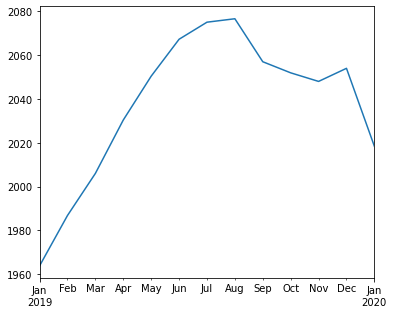

In [14]:
fcast.plot(figsize=(6,5));

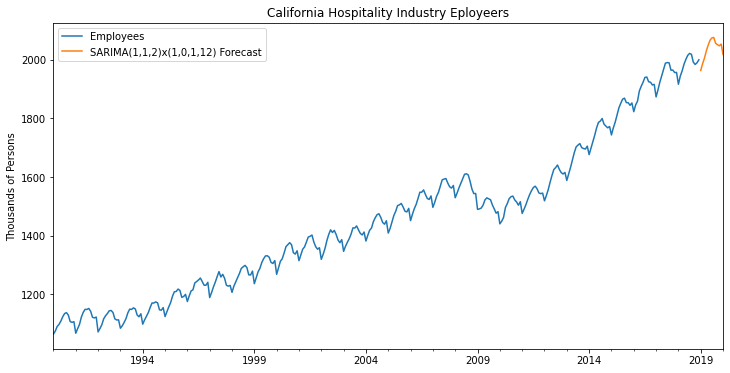

In [15]:
# отобразите общий график
ax = df.Employees.plot(figsize=(12,6))
fcast.plot()
title = 'California Hospitality Industry Eployeers'
ylabel='Thousands of Persons'
xlabel=''
ax.legend()
ax.set(title=title, xlabel=xlabel, ylabel=ylabel);